# Trabalho de Data Science - Aluno: Estêvão Guerra

## Etapa 1: ETL - Extract, Transform and Load

**DATASET** - [Link](data/database.csv)

**DATASOURCE** - [Link](https://www.kaggle.com/datasets/geometrein/helsinki-city-bikes/metadata)

## Etapa 2: Data Exploration

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/database.csv',nrows=100000)

In [8]:
df.head()

,Unnamed: 0,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100000 non-null  int64  
 1   departure               100000 non-null  object 
 2   return                  100000 non-null  object 
 3   departure_id            100000 non-null  int64  
 4   departure_name          100000 non-null  object 
 5   return_id               100000 non-null  float64
 6   return_name             100000 non-null  object 
 7   distance (m)            100000 non-null  float64
 8   duration (sec.)         100000 non-null  float64
 9   avg_speed (km/h)        99981 non-null   float64
 10  departure_latitude      100000 non-null  float64
 11  departure_longitude     100000 non-null  float64
 12  return_latitude         100000 non-null  float64
 13  return_longitude        100000 non-null  float64
 14  Air temperature (degC

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99981 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              99981 non-null  int64  
 1   departure               99981 non-null  object 
 2   return                  99981 non-null  object 
 3   departure_id            99981 non-null  int64  
 4   departure_name          99981 non-null  object 
 5   return_id               99981 non-null  float64
 6   return_name             99981 non-null  object 
 7   distance (m)            99981 non-null  float64
 8   duration (sec.)         99981 non-null  float64
 9   avg_speed (km/h)        99981 non-null  float64
 10  departure_latitude      99981 non-null  float64
 11  departure_longitude     99981 non-null  float64
 12  return_latitude         99981 non-null  float64
 13  return_longitude        99981 non-null  float64
 14  Air temperature (degC)  99981 non-null

In [11]:
df = df.drop(columns=['departure_latitude','departure_longitude','return_latitude','return_longitude'])

In [12]:
df.head()

,Unnamed: 0,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),Air temperature (degC)
0,0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,0.9
1,1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,0.9
2,2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,0.9
3,3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,0.9
4,4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,0.9


In [13]:
df['duration (min)'] = (df['duration (sec.)'] / 60).round(2)
df.drop(columns='duration (sec.)',inplace=True)

In [14]:
df = df[['departure_id','return_id','departure_name','return_name','departure','return','distance (m)','duration (min)','avg_speed (km/h)','Air temperature (degC)']]
df.head()

,departure_id,return_id,departure_name,return_name,departure,return,distance (m),duration (min),avg_speed (km/h),Air temperature (degC)
0,86,111.0,Kuusitie,Esterinportti,2020-03-23 06:09:44,2020-03-23 06:16:26,1747.0,6.68,0.261397,0.9
1,26,10.0,Kamppi (M),Kasarmitori,2020-03-23 06:11:58,2020-03-23 06:26:31,1447.0,14.48,0.099908,0.9
2,268,254.0,Porolahden koulu,Agnetankuja,2020-03-23 06:16:29,2020-03-23 06:24:23,1772.0,7.82,0.226695,0.9
3,751,106.0,Vallipolku,Korppaanmäentie,2020-03-23 06:33:53,2020-03-23 07:14:03,7456.0,40.10,0.185935,0.9
4,62,121.0,Länsisatamankatu,Vilhonvuorenkatu,2020-03-23 06:36:09,2020-03-23 07:04:10,7120.0,27.98,0.254437,0.9


In [15]:
maximo_temperatura = df['Air temperature (degC)'].max()
minimo_temperatura = df['Air temperature (degC)'].min()
print(f'A temperatura mínima é: {minimo_temperatura}')
print(f'A temperatura máxima é: {maximo_temperatura}')

A temperatura mínima é: -5.2
A temperatura máxima é: 11.6


## Etapa 3: Data Evoluation

### Etapa 3.1: Análise exploratória das Variáveis Qualitativas

In [16]:
import seaborn as sns
import matplotlib as plt

In [17]:
df.head()

,departure_id,return_id,departure_name,return_name,departure,return,distance (m),duration (min),avg_speed (km/h),Air temperature (degC)
0,86,111.0,Kuusitie,Esterinportti,2020-03-23 06:09:44,2020-03-23 06:16:26,1747.0,6.68,0.261397,0.9
1,26,10.0,Kamppi (M),Kasarmitori,2020-03-23 06:11:58,2020-03-23 06:26:31,1447.0,14.48,0.099908,0.9
2,268,254.0,Porolahden koulu,Agnetankuja,2020-03-23 06:16:29,2020-03-23 06:24:23,1772.0,7.82,0.226695,0.9
3,751,106.0,Vallipolku,Korppaanmäentie,2020-03-23 06:33:53,2020-03-23 07:14:03,7456.0,40.10,0.185935,0.9
4,62,121.0,Länsisatamankatu,Vilhonvuorenkatu,2020-03-23 06:36:09,2020-03-23 07:04:10,7120.0,27.98,0.254437,0.9


<AxesSubplot:>

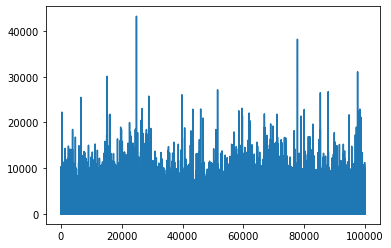

In [18]:
df['distance (m)'].plot()

<AxesSubplot:>

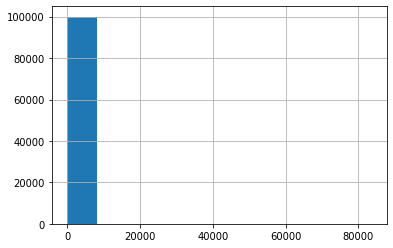

In [19]:
df['duration (min)'].hist()

<AxesSubplot:>

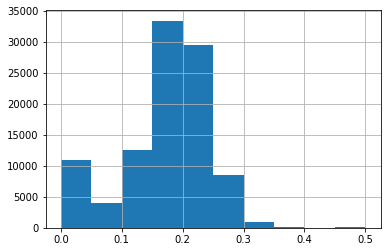

In [20]:
df['avg_speed (km/h)'].hist()

<AxesSubplot:>

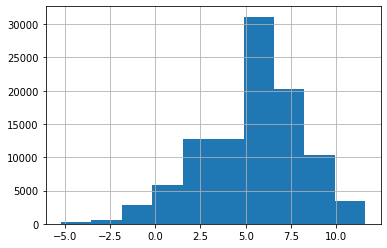

In [21]:
df['Air temperature (degC)'].hist()

Em processo...